In [122]:
import pandas as pd
import numpy as np
from datetime  import datetime

file_path = r'R:/ll/cj_YD_first_bpr_water_level.dat'

df = pd.read_csv(file_path,  header=None,sep=r'\s+')

df

,0,1,2,3,4,5,6,7,8
0,88.4860,10.1810,2023,3,20,0,15,0,3329.973
1,88.4860,10.1810,2023,3,20,0,30,0,3330.019
2,88.4860,10.1810,2023,3,20,0,45,0,3330.043
3,88.4860,10.1810,2023,3,20,1,0,0,3330.077
4,88.4860,10.1810,2023,3,20,1,15,0,3330.101
...,...,...,...,...,...,...,...,...,...
10333,65.2839,20.7641,2023,4,14,23,0,0,2747.480
10334,65.2839,20.7641,2023,4,14,23,15,0,2747.499
10335,65.2839,20.7641,2023,4,14,23,30,0,2747.516
10336,65.2839,20.7641,2023,4,14,23,45,0,2747.525


In [123]:
df_from_array = pd.DataFrame(df.to_numpy(), columns=['lon', 'lat', 'year', 'month', 'day', 'hour', 'min', 'sec', 'water'])

df_from_array

,lon,lat,year,month,day,hour,min,sec,water
0,88.4860,10.1810,2023.0,3.0,20.0,0.0,15.0,0.0,3329.973
1,88.4860,10.1810,2023.0,3.0,20.0,0.0,30.0,0.0,3330.019
2,88.4860,10.1810,2023.0,3.0,20.0,0.0,45.0,0.0,3330.043
3,88.4860,10.1810,2023.0,3.0,20.0,1.0,0.0,0.0,3330.077
4,88.4860,10.1810,2023.0,3.0,20.0,1.0,15.0,0.0,3330.101
...,...,...,...,...,...,...,...,...,...
10333,65.2839,20.7641,2023.0,4.0,14.0,23.0,0.0,0.0,2747.480
10334,65.2839,20.7641,2023.0,4.0,14.0,23.0,15.0,0.0,2747.499
10335,65.2839,20.7641,2023.0,4.0,14.0,23.0,30.0,0.0,2747.516
10336,65.2839,20.7641,2023.0,4.0,14.0,23.0,45.0,0.0,2747.525


In [124]:

df_from_array['datetime'] = df_from_array.apply(lambda row: datetime(year=int(row['year']),
                                             month=int(row['month']),
                                             day=int(row['day']),
                                             hour=int(row['hour']),
                                             minute=int(row['min']),
                                             second=int(row['sec'])),
                         axis=1)

df_from_array

,lon,lat,year,month,day,hour,min,sec,water,datetime
0,88.4860,10.1810,2023.0,3.0,20.0,0.0,15.0,0.0,3329.973,2023-03-20 00:15:00
1,88.4860,10.1810,2023.0,3.0,20.0,0.0,30.0,0.0,3330.019,2023-03-20 00:30:00
2,88.4860,10.1810,2023.0,3.0,20.0,0.0,45.0,0.0,3330.043,2023-03-20 00:45:00
3,88.4860,10.1810,2023.0,3.0,20.0,1.0,0.0,0.0,3330.077,2023-03-20 01:00:00
4,88.4860,10.1810,2023.0,3.0,20.0,1.0,15.0,0.0,3330.101,2023-03-20 01:15:00
...,...,...,...,...,...,...,...,...,...,...
10333,65.2839,20.7641,2023.0,4.0,14.0,23.0,0.0,0.0,2747.480,2023-04-14 23:00:00
10334,65.2839,20.7641,2023.0,4.0,14.0,23.0,15.0,0.0,2747.499,2023-04-14 23:15:00
10335,65.2839,20.7641,2023.0,4.0,14.0,23.0,30.0,0.0,2747.516,2023-04-14 23:30:00
10336,65.2839,20.7641,2023.0,4.0,14.0,23.0,45.0,0.0,2747.525,2023-04-14 23:45:00


In [125]:
grouped = df_from_array.groupby(['lon', 'lat','datetime'])['water'].apply(list).reset_index()

grouped

,lon,lat,datetime,water
0,-9999.0,-9999.0,2023-03-31 07:15:00,[2829.358]
1,-9999.0,-9999.0,2023-03-31 07:30:00,[2829.354]
2,-9999.0,-9999.0,2023-03-31 07:45:00,[2829.358]
3,-9999.0,-9999.0,2023-03-31 08:00:00,[2829.364]
4,-9999.0,-9999.0,2023-03-31 08:15:00,[2829.373]
...,...,...,...,...
10333,89.8,17.5,2023-04-14 23:00:00,[2335.394]
10334,89.8,17.5,2023-04-14 23:15:00,[2335.397]
10335,89.8,17.5,2023-04-14 23:30:00,[2335.39]
10336,89.8,17.5,2023-04-14 23:45:00,[2335.381]


In [126]:
grouped = grouped[(grouped['lon'] != -9999.0000) & (grouped['lat'] != -9999.0000)]
grouped['water'] = grouped['water'].apply(lambda x: x[0])
grouped

C:\Users\jixianpu\AppData\Local\Temp\ipykernel_21796\1321606264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped['water'] = grouped['water'].apply(lambda x: x[0])


,lon,lat,datetime,water
44,65.2839,20.7641,2023-03-16 02:45:00,2746.871
45,65.2839,20.7641,2023-03-16 03:00:00,2746.805
46,65.2839,20.7641,2023-03-16 04:15:00,2746.515
47,65.2839,20.7641,2023-03-16 04:30:00,2746.468
48,65.2839,20.7641,2023-03-16 04:45:00,2746.430
...,...,...,...,...
10333,89.8000,17.5000,2023-04-14 23:00:00,2335.394
10334,89.8000,17.5000,2023-04-14 23:15:00,2335.397
10335,89.8000,17.5000,2023-04-14 23:30:00,2335.390
10336,89.8000,17.5000,2023-04-14 23:45:00,2335.381


In [127]:
unique_coords = grouped[['lon', 'lat']].drop_duplicates()
unique_coords

,lon,lat
44,65.2839,20.7641
2886,88.4860,10.1810
5378,89.5600,14.7100
7850,89.8000,17.5000


## 绘图

导入绘图的库

In [128]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

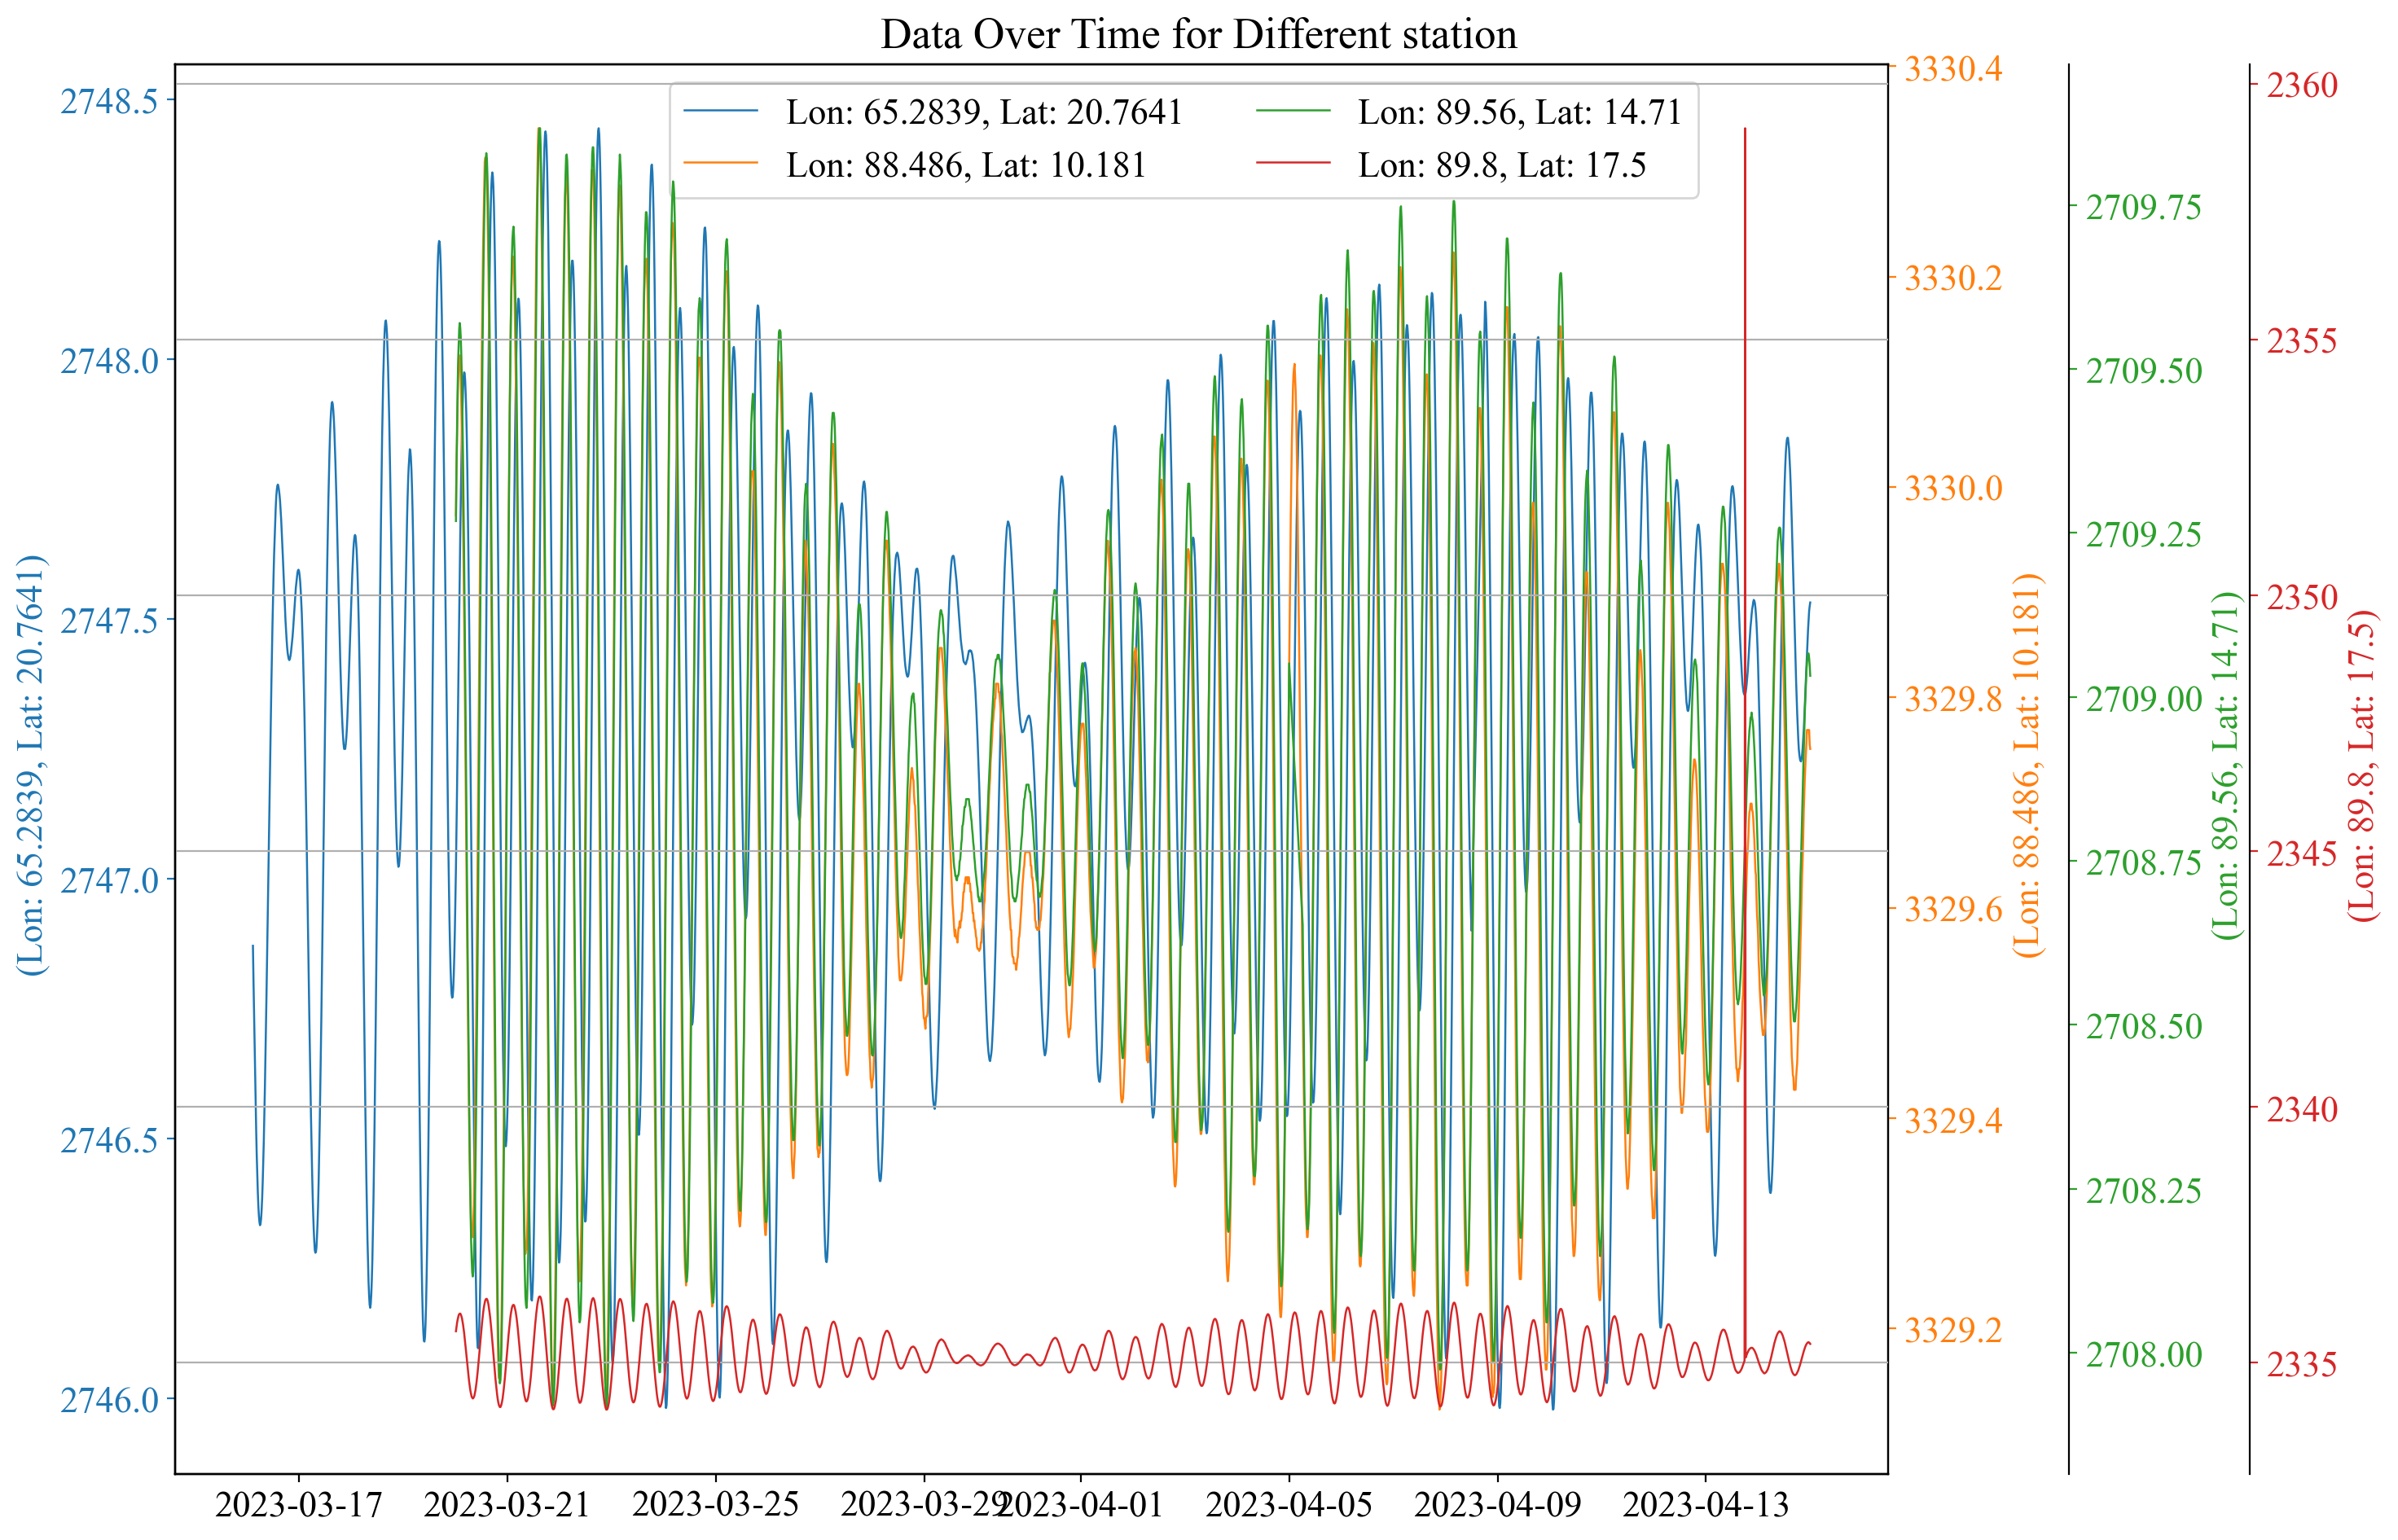

In [130]:
fig, ax1 = plt.subplots(figsize=(15, 10), dpi=200)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 16
axes = [ax1]
colors = plt.cm.tab10.colors
lines = []  
labels = []  
for i, (_, coord) in enumerate(unique_coords.iterrows()):
    lon = coord['lon']
    lat = coord['lat']
    filtered_data = grouped[(grouped['lon'] == lon) & (grouped['lat'] == lat)]
    
    if i == 0:
        ax = ax1
    else:
        ax = ax1.twinx()
        axes.append(ax)
        ax.spines['right'].set_position(('outward', 80 * (i - 1)))  
    
    color = colors[i % len(colors)]
    line, = ax.plot(filtered_data['datetime'], filtered_data['water'], color=color,
                    linewidth=0.9, linestyle='-', label=f'Lon: {lon}, Lat: {lat}')
    ax.set_ylabel(f' (Lon: {lon}, Lat: {lat})')
    ax.yaxis.label.set_color(color)
    ax.tick_params(axis='y', colors=color)
    
    lines.append(line)
    labels.append(f'Lon: {lon}, Lat: {lat}')
ax1.legend(lines, labels, loc='best',ncols=2, bbox_to_anchor=(0.9, 1))
plt.xticks(rotation=55)
plt.grid()
fig.suptitle('Data Over Time for Different station', y=0.95)
plt.tight_layout()
plt.show()